In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 3 

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 132 images belonging to 3 classes.
Found 36 images belonging to 3 classes.


In [5]:
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    
    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Fourth Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])


c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,680,067 (36.93 MB)

 Trainable params: 9,680,067 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator
)

c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3346 - loss: 1.5995 - val_accuracy: 0.3333 - val_loss: 1.0979
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 580ms/step - accuracy: 0.3324 - loss: 1.0981 - val_accuracy: 0.3889 - val_loss: 1.1290
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 641ms/step - accuracy: 0.3621 - loss: 1.0947 - val_accuracy: 0.3333 - val_loss: 1.1005
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 885ms/step - accuracy: 0.3474 - loss: 1.1033 - val_accuracy: 0.3611 - val_loss: 1.1089
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 672ms/step - accuracy: 0.3638 - loss: 1.1047 - val_accuracy: 0.3611 - val_loss: 1.1031
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 604ms/step - accuracy: 0.3680 - loss: 1.0927 - val_accuracy: 0.4167 - val_loss: 1.1205
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 593ms/step - accuracy: 0.3961 - loss: 1.0766 - val_accuracy: 0.3333 - val_loss: 1.1152
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 595ms/step - accuracy: 0.3854 - loss: 1.1040 - val_accuracy: 0.5278 - val_

In [9]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4028 - loss: 2.4421 
Test accuracy: 0.4167


In [10]:
import matplotlib.pyplot as plt

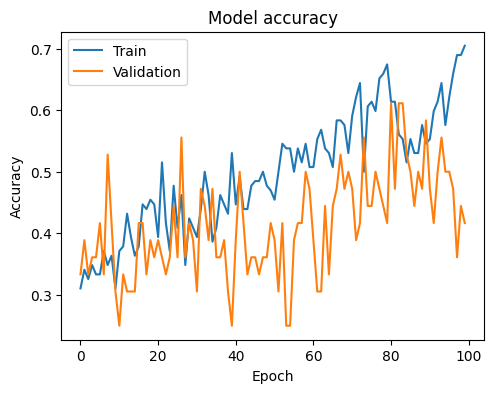

In [11]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_single_image(image_path, model):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array = img_array / 255.0  # Rescale

    # Make prediction
    predictions = model.predict(img_array)
    
    # Get class names from your training data
    class_names = ['Black_Footed_Albatross', 'Laysan_Albatross', 'Sooty_Albatross']
    
    # Get the predicted class and confidence
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0]) * 100

    # Print results
    print(f"\nPredicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%\n")
    
    # Print confidence for all classes
    print("Confidence scores for all classes:")
    for class_name, conf in zip(class_names, predictions[0]):
        print(f"{class_name}: {conf*100:.2f}%")

    return predicted_class, confidence

# Use the function
image_path = r"C:\Users\rishi\Desktop\beakyproj\test\001.Black_footed_Albatross\Black_Footed_Albatross_0001_796111.jpg"
prediction, confidence = predict_single_image(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step

Predicted class: Black_Footed_Albatross
Confidence: 42.77%

Confidence scores for all classes:
Black_Footed_Albatross: 42.77%
Laysan_Albatross: 24.51%
Sooty_Albatross: 32.73%


In [13]:
model.save('model.h5')


In [14]:
import tensorflow as tf

# Load the H5 model
model = tf.keras.models.load_model('model.h5')

# Create the converter from the loaded model
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Set optimization options
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("TensorFlow Lite model saved successfully!")

INFO:tensorflow:Assets written to: C:\Users\rishi\AppData\Local\Temp\tmpn0xhq4rs\assets


INFO:tensorflow:Assets written to: C:\Users\rishi\AppData\Local\Temp\tmpn0xhq4rs\assets


Saved artifact at 'C:\Users\rishi\AppData\Local\Temp\tmpn0xhq4rs'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1783534056080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1783832849360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1783832852624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1783832848976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1783832853968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1783832854160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1783832851664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1783832851856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1783832854352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1783903290960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  178390